29.4.25: evtl. Beispiel für ZGWS vereinfachen

<center>
<img src="VL05_Material/kontextsensitivitaet.png" width="50%" />
</center>

# <div style="color:blue;">1. Lagemaße</div>
# <div>2. Informationsvisualisierung</div>
# <div>3. Streumaße</div>

In [1]:
# Standard-Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# darüberhinaus...
import seaborn as sns

### 1.1 Wiederholung: Boxplot

In [3]:
# Punkte 0,1,...,100,160 (160 ist ein "Outlier")
data = np.arange(0,102,1)
data[-1] = 160
data


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 160])

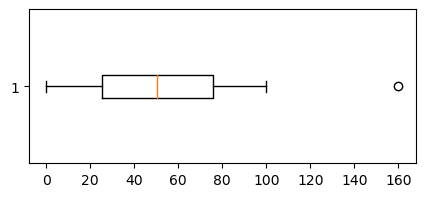

In [86]:
# Boxplot
plt.boxplot ( data, vert=False );
plt.gcf().set_size_inches(5,2);
# Wieviel % der Daten liegen in der Box?

<div class="alert alert-block alert-warning"><b>Frage: </b>Was bedeuten die jeweiligen Linien?</div>

<img src="VL09_Material/boxplotexplanation.png" width="120%" />

In [16]:
# Create Plots and save to disc, in order to show them larger
plt.boxplot ( data, vert=False );
plt.gcf().set_size_inches(5,2);
plt.annotate(xy=(25,1),xytext=(0,1.4),text="unteres Quartil (=25%-Quantil)",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(50,1),xytext=(50,1.2),text="Median (=50% Quantil)",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(75,1),xytext=(90,0.7), ha="right", text="oberes Quartil (=75%-Quantil)",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(160,1),xytext=(150,0.7),ha="right",text="Ausreißer",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(100,1),xytext=(82,0.3),ha="center",text='rechter Whisker (endet beim letzten Punkt\n<= 75%-Quantil+1.5*"Boxbreite")',color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.ylim(0.2,1.6);
plt.tight_layout()
plt.savefig("VL09_Material/boxplotexplanation.png", dpi=200)
plt.close()

plt.boxplot ( data, vert=False );
plt.gcf().set_size_inches(5,2);
plt.annotate(xy=(25,1),xytext=(0,1.4),text="unteres Quartil (=25%-Quantil)",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(50,1),xytext=(50,1.2),text="Median (=50% Quantil)",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(75,1),xytext=(90,0.7), ha="right", text="oberes Quartil (=75%-Quantil)",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(160,1),xytext=(150,0.7),ha="right",text="Ausreißer",color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.annotate(xy=(100,1),xytext=(82,0.3),ha="center",text='rechter Whisker (endet beim letzten Punkt\n<= 75%-Quantil+1.5*IQR)',color="blue",arrowprops={"color":"blue","arrowstyle":"->"})
plt.ylim(0.2,1.6);
plt.tight_layout()
plt.savefig("VL09_Material/boxplotexplanation_iqr.png", dpi=200)
plt.close()


### 1.2 (empirisches) Quantil

Ein **q-Quantil** $Q_q$ erfüllt die notwendige Eigenschaft, dass (q\*100)\% der Daten kleinergleich $Q_q$ ist.
<br>
<br>
<br>
<br>

In [67]:
# die unteren 50% der Daten: 1, 2, ..., 50
# die oberen 50% der Daten: 51, 52, ..., 100
np.quantile ( range(1,101), q=0.5 )


50.5

In [68]:
# die unteren 50% der Daten: 0,1,...,49,(50)
# die oberen 50% der Daten: (50),51,52,...,100
np.quantile ( range(0,101), q=0.5 )


50.0

Es gibt verschiedene Möglichkeiten für eine formale Definition. Eine einfache Definition lautet:<div class="smallfont">(Man kann hier noch genauer werden: Wenn das gesuchte Quantil zwischen zwei Punkten liegt, aber näher am linken, dann sollte der Rückgabewert auch den linken Punkt höher gewichten. So ist es in numpy implementiert.)</div>

$$
Q_q(x) = \begin{cases}
\frac{1}{2}(x_{nq}+x_{nq+1})\ ,& \text{wenn $nq$ ganzzahlig ist,} \\
(x_{\lfloor nq+1 \rfloor }\ ,& \text{wenn $nq$ nicht ganzzahlig ist.}
\end{cases}
$$

Hierbei sei der Datenvektor $x=(x_1,...,x_n)\in\mathbb{R}^n$ der Größe nach sortiert,<br>und ${\lfloor 3.14 \rfloor }=3$ bezeichne die Floor-Funktion.

**Verhalten bei Outliern:**

In [21]:
# Zahlen 0,1,...,99,100 (keine Outlier)
data = np.arange(0,101)

np.quantile(data,q=0.5),      \
   np.quantile(data, q=0.99), \
   max (data)


(50.0, 99.0, 100)

In [22]:
# Zahlen 0,1,...,99,10000 (ein Outlier)
data = np.arange(0,100).tolist() + [10000]

np.quantile(data, q=0.5),     \
   np.quantile(data, q=0.99), \
   max(data)


(50.0, 99.0, 10000)

**Ergebnis:** Quantile sind robust gegenüber dem Vorliegen von Outliern.  
  
**Best practice:** Zusätzlich zum Maximum z.B. das 99%-Quantil anschauen, zur Beschreibung des Wertebereichs der Daten.

### 1.3 Median

Der Median ist identisch zum 50%-Quantil der Daten: <span class="smallfont">(wenn obige Definition des Quantils verwendet wird)</span>


$$
\text{Median}(x) = \begin{cases}
\frac{1}{2}(x_{n/2}+x_{n/2+1})\ ,& \text{wenn $n$ gerade ist,} \\
(x_{\lfloor n/2+1 \rfloor }\ ,& \text{wenn $n$ ungerade ist.}
\end{cases}
$$

Hierbei sei der Datenvektor $x=(x_1,...,x_n)\in\mathbb{R}^n$ der Größe nach sortiert,<br>und ${\lfloor 3.14 \rfloor }=3$ bezeichne die Floor-Funktion.

Analog ist das Minimum identisch zum 0%-Quantil und das Maximum identisch zum 100%-Quantil.

<div class="alert alert-block alert-warning"><b>Frage:</b> Was ist der Median von x=[9,2,9,4] 
?</div>

In [2]:
np.median ( [9,2,9,4] )

6.5

### 1.4 Arithmetischer Mittelwert

Der (arithmetische) Mittelwert (engl.: *(arithmetic) mean*) eines Datenvektors $x=(x_1,...,x_n)\in \mathbb{R}^n$ ist definiert via
$$
\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

<div class="alert alert-block alert-warning"><b>Frage:</b> Was ist der Mittelwert von x=[9,2,9,4]?</div>

In [3]:
np.mean ( [9,2,9,4] )

6.0

**Verhalten bei Outliern:**

In [28]:
# Zahlen 0,1,...,99,100 (keine Outlier)
data = np.arange(0,101)

np.median(data), np.mean(data)


(50.0, 50.0)

In [29]:
# Zahlen 0,1,...,99,10000 (ein Outlier)
data = np.arange(0,100).tolist() + [10000]

np.median(data), np.mean(data)


(50.0, 148.01980198019803)

**Ergebnis:** Der Median ist robust gegenüber dem Vorliegen von Outliern, der Mittelwert nicht.  
  
**Best practice:** Der Median ist eine gute Größe, die allgemeine Lage der Daten zu beschreiben (d.h. ein gutes *Lagemaß*).

<div class="alert alert-block alert-warning"><b>Frage:</b> Welche Gründe können Sie sich trotzdem für die Verwendung des Mittelwerts vorstellen?</div>

### 1.5 Gesetz der großen Zahlen

Neben der größeren Akzeptanz ("Management-tauglich") des Mittelwerts weitere Begründung durch das G. d. gr. Z.

<div class="alert alert-block alert-info">
    <b>Gesetz der großen Zahlen (Spezialfall):</b> Es seien $X_1,X_2,\dots$ reellwertige Zufallszahlen (z.B. wiederholte Messungen):    
$$X_i = \mu + \epsilon_i\ .$$
    
Hierbei modelliere $\mu$ den wahren Wert und $\epsilon_i$ ein zufälliges Rauschen, das während der Messung entsteht.  
<br>
Dann gilt\*, dass der Mittelwert der ersten $n$ Zahlen gegen den wahren Wert konvergiert:

$$
\lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n X_i = \mu
$$
</div><br>
<div class="smallfont">* unter technischen Annahmen, z.B.: Das Rauschen sei symmetrisch um 0 verteilt (d.h. $\epsilon_1$ habe die gleiche Verteilung wie $-\epsilon_1$); die einzelnen Messungen liefern unabhängige, aber identisch verteilte Ergebnisse; und es können keine beliebig hohen Rauschbeträge auftreten (d.h. $\epsilon_1 \le C$ für ein $C>0$).</div>

<br>**Interpretation:** Der arithmetische Mittelwert liefert auch für endliches $n$ eine gute Beschreibung des "wahren Wertes".  
<div class="smallfont">(Allgemein ist der "wahre Wert" der Erwartungswert $\mathbb{E}[X]$ der Verteilung, die den Zufallszahlen $X_1,\dots$ zugrunde liegt.)</div>

Gesetz der großen Zahlen im Beispiel:

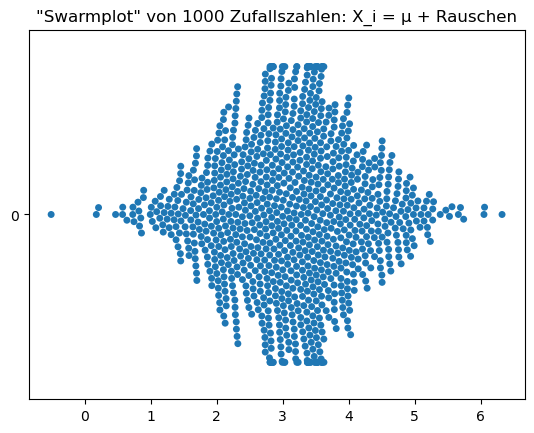

In [95]:
# Zufallszahlen X1,X2,..., wobei X_i = µ + Rauschen
R = np.random.default_rng ( 42 )
µ = 3.141592
x = R.normal ( loc=µ, scale=1, size=1000 )
sns.swarmplot ( data=x, orient="h" );
plt.title('"Swarmplot" von 1000 Zufallszahlen: '+
          'X_i = µ + Rauschen');

# hier wird ein Swarmplot verwendet; "geordnete"
# Alternative zum Stripplot, die sich visuell einer
# KDE annähert

In [50]:
# Mittelwert der ersten n Zahlen
x[:10].mean(), x[:100].mean(), x[:1000].mean()


(2.806020691594129, 3.0913223885161427, 3.1127004490040533)

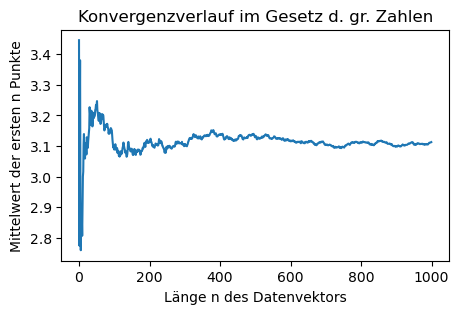

In [94]:
# Visualisierung des Konvergenzverlaufs
plt.plot ( x.cumsum() / np.ones(1000).cumsum() )
plt.xlabel("Länge n des Datenvektors")
plt.ylabel("Mittelwert der ersten n Punkte")
plt.title("Konvergenzverlauf im Gesetz d. gr. Zahlen");
plt.gcf().set_size_inches(5,3);


<center>
<img src="VL05_Material/kontextsensitivitaet.png" width="50%" />
</center>

# <div>1. Lagemaße</div>
# <div style="color:blue;">2. Informationsvisualisierung</div>
# <div>3. Streumaße</div>

### 2.1 Eine historische Einführung 

<center><img src="VL05_Material/friendlywainer_histofdataviz.png" width="60%" />
<div class="tinyfont">M. Friendly, H. Wainer: A History of Data Visualization and Graphic Communication, Harvard University Press, 2021</div></center>

<div style="color:red; padding-left: 700px">xxxxxxxxx</div>

**William Playfair** (1759-1823): Ein Meilenstein in der grafischen Darstellung von Daten
<center><img src="VL05_Material/Playfair_TimeSeries-2.png" width="65%" />
<div class="tinyfont">William Playfair: Commercial and Political Atlas, 1786
(https://en.wikipedia.org/wiki/File:Playfair_TimeSeries-2.png)</div></center>

**William Playfair** (1759-1823): Mutmaßlich Erfinder von Balken- und Piechart ...

<center><img src="VL05_Material/1786_Playfair_-_Exports_and_Imports_of_Scotland_to_and_from_different_parts_for_one_Year_from_Christmas_1780_to_Christmas_1781.jpg" width="70%" />

<div class="tinyfont">William Playfair: Commercial and Political Atlas, 1786
(https://en.wikipedia.org/wiki/William_Playfair)</div></center>

... allerdings im Detail manchmal noch nicht ganz modern:

<center><img src="VL05_Material/Playfair-piechart.jpg" width="50%" />

<div class="tinyfont">William Playfair: The Commercial and Political Atlas and Statistical Breviary, 1801
(https://en.wikipedia.org/wiki/William_Playfair)</div></center>

<center><img src="VL05_Material/playfair3.png" width="60%" />
(Jahre sind nicht äquidistant verteilt)
<div class="tinyfont">Wainer, H., Friendly, M. (2022). On the Origins of Data Visualization. In: Carriquiry, A.L., Tanur, J.M., Eddy, W.F. (eds) Statistics in the Public Interest. Springer Series in the Data Sciences. Springer, Cham. https://doi.org/10.1007/978-3-030-75460-0_27</div></center>

<center><img src="VL05_Material/friendlywainer_histofdataviz.png" width="60%" />
<div class="tinyfont">M. Friendly, H. Wainer: A History of Data Visualization and Graphic Communication, Harvard University Press, 2021</div></center>

<div style="color:red; padding-left: 250px">xxxxxxxxxxxxxxxxxxxxxxxxxxxx</div>

Frühe Datenvisualisierungen:

"Oresme's Pipes" (~1360):

<img src="VL05_Material/oresme.png" width="60%" />

 “If Oresme had data,  
 we might have had  
 statistical graphs  
 400 years before Playfair”
 <div class="tinyfont">(aus [2], Zitat aus Funkhouser, 1937)</div>

Michael Florent van Langren (1628):
    
<img src="VL05_Material/langren.png" width="90%" />

**"The first (Known) Statistical Graph"**

<div class="tinyfont">Friendly, Michael et al. “The First (Known) Statistical Graph: Michael Florent van Langren and the “Secret” of Longitude.” The American Statistician 64 (2010): 174 - 184.      
https://www.datavis.ca/papers/langren-TAS09154.pdf
</div>

Der erste "Statistische Graph":

Michael Florent van Langren (1628):  

**Schätzung des Längengradunterschieds zwischen Toledo und Rom.**
  
  
<img src="VL05_Material/langren3.png" width="90%" />

<div class="tinyfont">Aus: Friendly, Michael et al. “The First (Known) Statistical Graph: Michael Florent van Langren and the “Secret” of Longitude.” The American Statistician 64 (2010): 174 - 184.      
https://www.datavis.ca/papers/langren-TAS09154.pdf
</div>

<center><img src="VL05_Material/langren2.png" width="70%" />
<div class="tinyfont">aus [2]<div></center>

**Christiaan Huygens (1629-1695)**: Erste quantitative Visualisierung

<center><img src="VL05_Material/huygens.png" width="60%" />
<div class="tinyfont">Wainer, H., Friendly, M. (2022). On the Origins of Data Visualization. In: Carriquiry, A.L., Tanur, J.M., Eddy, W.F. (eds) Statistics in the Public Interest. Springer Series in the Data Sciences. Springer, Cham. https://doi.org/10.1007/978-3-030-75460-0_27</div></center>

<center><img src="VL05_Material/friendlywainer_histofdataviz.png" width="60%" />
<div class="tinyfont">M. Friendly, H. Wainer: A History of Data Visualization and Graphic Communication, Harvard University Press, 2021</div></center>

<div style="color:red; padding-left: 800px">xxxxxxxxxxxxxxxxxxxx</div>

**Charles Minard (1781-1870):** “the best statistical graphic ever produced” (E. Tufte)

<img src="VL05_Material/minard.png" width="95%" />
<div class="tinyfont">https://en.wikipedia.org/wiki/Charles_Joseph_Minard</div>

**John Snow** (1813-1858): "erste Root Cause Analyse" (Ursachensuche bei einem Cholera-Ausbruch 1854 in London)
<center><img src="VL05_Material/1024px-Snow-cholera-map-1.jpg" width="50%" />
<div class="tinyfont">https://en.wikipedia.org/wiki/John_Snow</div></center>

<center><div style="font-size:1000%">...</div></center>

<center>
<img src="VL05_Material/toronto.png" width="80%" />
<div class="tinyfont">Aus: Andy Kirk. Data Visualization: A Successful Design Process. Packt Publishing, 2012. S. 43</div>
</center>

<img src="VL05_Material/moderna_clean.png" />

<img src="VL05_Material/moderna.png" />
<div class="tinyfont">Moderna-Zulassungsstudie ihres COVID-19-Impfstoffs: https://www.fda.gov/media/144434/download, S. 28</div>

<center><img src="VL05_Material/globalwarming01.png" width="90%" /></center>

<center><img src="VL05_Material/globalwarming02.png" width="90%" />
<div class="tinyfont">Ed Hawkins, University of Reading: https://showyourstripes.info/l/globe</div></center>

**Gute Quellen:**

[1] M. Friendly, H. Wainer: A History of Data Visualization and Graphic Communication, Harvard University Press, 2021  
[2] M. Friendly: A gleam in the mind's eye. Stories and lessond from the history of data visualization. (Talk given 2021)
https://www.datavis.ca/papers/SSC2021-talk.pdf

### 2.2 Theoretische Grundlagen

Einige Meilensteine:
- Max Wertheimer, Kurt Koffka, Wolfgang Kohler (ab 1922): Gestaltpsychologie (*Gestalt Laws*)
- Jaques Bertin: Autor von *Sémiologie graphique* / *Semiology of Graphics* (1967 / 1983)
- John Tukey: Autor von *Exploratory Data Analysis*, 1977 (Erfinder des Worts "Bit")
- Edward Tufte: Autor von z.B. *The Visual Display of Quantitative Information*, 1982 (Erfinder des Worts "Chartjunk")
- Leland Wilkinson: Autor von *The Grammar of Graphics*, 1999 (Grundlage von modernen Grafikpaketen wie ggplot2)

> Most principles of design should be greeted with some skepticism... we may come to see only through the lenses of word authority rather than with our own eyes.

<div align="right">E. Tufte: The Visual Display of Quantitative Information</div>


**Gestalt Laws:** Gesetz der Nähe

<center>
<img src="VL05_Material/gesetzdernaehe.png" width="90%"/>
<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_proximity.svg</div>
</center>

Elemente mit geringen Abständen zueinander werden  
als zusammengehörig wahrgenommen.



**Gestalt Laws:** Gesetz der Ähnlichkeit

<center>
<img src="VL05_Material/gesetzderaehnlichkeit.png" width="40%"/>

<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_similarity.svg</div>
</center>

Einander ähnliche Elemente werden eher als zusammengehörig erlebt als einander unähnliche.


<div class="alert alert-block alert-warning"><b>Aufgabe:</b> Welches Gesetz ist rechts verletzt?

<div class="smallfont">
<b>Gestalt Laws:</b> Gesetz der Nähe

<img src="VL05_Material/gesetzdernaehe.png" width="40%"/>
<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_proximity.svg</div>

Elemente mit geringen Abständen<br>
zueinander werden als<br>
zusammengehörig wahrgenommen.
<br>
<br>
<br>
<br>
<br>
<b>Gestalt Laws:</b> Gesetz der Ähnlichkeit
<img src="VL05_Material/gesetzderaehnlichkeit.png" width="20%"/>

<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_similarity.svg</div>
</center>

Einander ähnliche Elemente werden<br>
eher als zusammengehörig erlebt<br>
als einander unähnliche.
</div>

<div class="smallfont">
<b>Gestalt Laws:</b> Gesetz der Nähe

<img src="VL05_Material/gesetzdernaehe.png" width="40%"/>
<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_proximity.svg</div>
<br>
<br>
<br>
Elemente mit geringen Abständen<br>
zueinander werden als<br>
zusammengehörig wahrgenommen.

<b>Gestalt Laws:</b> Gesetz der Ähnlichkeit
<br><br><br>
<img src="VL05_Material/gesetzderaehnlichkeit.png" width="20%"/>

<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_similarity.svg</div>
</center>

Einander ähnliche Elemente werden<br>
eher als zusammengehörig erlebt<br>
als einander unähnliche.
</div>

<div class="alert alert-block alert-warning"><b>Aufgabe:</b> Welches Gesetz ist rechts verletzt?

<div class="smallfont">
<b>Gestalt Laws:</b> Gesetz der Nähe

<img src="VL05_Material/gesetzdernaehe.png" width="40%"/>
<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_proximity.svg</div>

Elemente mit geringen Abständen<br>
zueinander werden als<br>
zusammengehörig wahrgenommen.
<br>
<br>
<br>
<br>
<br>
<b>Gestalt Laws:</b> Gesetz der Ähnlichkeit
<img src="VL05_Material/gesetzderaehnlichkeit.png" width="20%"/>

<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_similarity.svg</div>
</center>

Einander ähnliche Elemente werden<br>
eher als zusammengehörig erlebt<br>
als einander unähnliche.
</div>

<div class="smallfont">
<b>Gestalt Laws:</b> Gesetz der Nähe

<img src="VL05_Material/gesetzdernaehe.png" width="40%"/>
<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_proximity.svg</div>

<div style="color:blue">Elemente mit geringen Abständen<br>
zueinander werden als<br>
zusammengehörig wahrgenommen.</div>
<br><br><br><br><br>
    <div style="color:blue"><b>Gestalt Laws:</b> Gesetz der Ähnlichkeit</div>
<img src="VL05_Material/gesetzderaehnlichkeit.png" width="20%"/>

<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestalt_similarity.svg</div>
</center>

Einander ähnliche Elemente werden<br>
eher als zusammengehörig erlebt<br>
als einander unähnliche.
</div>

Es gibt weitere *Gestalt Laws*, die auf die 20er-Jahre zurückgehen. Zusätzliche Gesetze von B. Palmer 1999, u.a.:
<div class="tinyfont">Stephen E. Palmer: Vision Science. MIT Press, Cambridge (USA) 1999</div>

**Gesetz der gemeinsamen Region:**  
&nbsp;  
  
<center>
<img src="VL05_Material/gesetzdergemeinsamenregion.png" width="40%"/>
<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestaltpsychologie_Gemeinsame_Region.svg</div>
</center>

Elemente in abgegrenzten Gebieten werden als zusammengehörig empfunden.

**Gesetz der verbundenen Elemente:**

<center>
<img src="VL05_Material/gesetzderverbundenenelemente.png" width="90%"/>
<div class="tinyfont">https://de.wikipedia.org/wiki/Datei:Gestaltpsychologie_Verbundene_Elemente.svg</div>
</center>

Verbundene Elemente werden als ein Objekt empfunden.

Im Rahmen der Gestaltpsychologie wird auch **Kontextsensitivität** genannt:  
Die Wahrnehmung einzelner Teile wird von der ganzheitlichen Wahrnehmung beeinflusst.
<br><br><br>
<center>
<img src="VL05_Material/kontextsensitivitaet.png" width="30%" />
<br><br><br>
<div class="tinyfont">https://upload.wikimedia.org/wikipedia/commons/6/65/ABC121314.svg</div></center>

Untersuchung von graphischen Elementen (nach MacKinlay, in der Tradition von Jaques Bertins):
<br><br>
<img src="VL05_Material/datentypen.png" />
<br><br>
<div class="tinyfont">Aus: Nazemi, Kawa & Kaupp, Lukas & Burkhardt, Dirk & Below, Nicola. (2021). Datenvisualisierung.<br>
    Adaptiert nach Mackinlay, Jock. 1986. „Automating the design of graphical presentations of relational information.“
ACM Trans. Graph. 5 (2): 110–41. doi:10.1145/22949.22950.</div>

### 2.3 Vorher/Nachher-Vergleiche

**Beispiel:** Sollten wir die Gesundheitsausgaben erhöhen?

<div class="tinyfont">Nach: Scott Berinato: Good Charts: The HBR Guide to Making Smarter, More Persuasive Data Visualizations. Harvard Business Press Books, 2016.<br>Siehe auch: https://hbr.org/2016/06/visualizations-that-really-work</div>

Erster Versuch:

<img src="VL05_Material/beispiel_healthcare_schlecht.png" />

Zweiter Versuch:

<img src="VL05_Material/beispiel_healthcare_besser.png" />

“Look at all the data I have and the work I’ve done!”

**Gut:** klare Message (in Bild und Text!)  
**Gut:** auf einen Blick intuitiv begreifbar  
**Diskutabel:** der Ausschnitt ist suggestiv (=manipulativ)

 **Beispiel:** Wo soll unsere Firma investieren?
 <div class="tinyfont">Sejal Vora. The Power of Data Storytelling. Sage Publications Pvt. Ltd, 2019.</div>

<img src="VL05_Material/regionalsales01.png" />

<img src="VL05_Material/regionalsales02.png" />

"unkommentierter" Überblick über die Daten.  
(Guter erster Schritt!)

**Gut:** Eine Message wird aktiv herausgearbeitet.  
**Diskutabel:** Die Grafik ist immer noch recht komplex.

**Besser**, wenn die Grafik noch erklärt wird:
> &nbsp;
> - Hong Kong and Singapore continued to dominate regional sales; however, (...) [they] reduced their overall revenue contribution to 54% in 2017 (...).
> - Emerging markets like India, Malaysia and Thailand on the other hand recorded a revenue growth between 14% and 19% (...) making them future growth drivers for the company’s revenue generation.
> - China maintained its significance with a marginal 4% revenue growth, while Indonesia and Vietnam performed poorly (...).

<img src="VL05_Material/regionalsales02.png" />

<div class="alert alert-block alert-info">
<b>Zusammenfassung:</b><br><br>
   - Zielgruppe festlegen<br>  
   - Kernaussage 1. für sich und 2. visuell herausarbeiten<br>  
   - vereinfachen und Unnötiges weglassen<br>  
   - Sehgewohnheiten (z.B. Gestalt Laws) beachten<br><br>
<b>- bei aller Vereinfachung: nicht lügen!</b>
</div>

<center>
<img src="VL05_Material/kontextsensitivitaet.png" width="50%" />
</center>

# <div>1. Lagemaße</div>
# <div>2. Informationsvisualisierung</div>
# <div style="color:blue;">3. Streumaße</div>

### 3.1 Wiederholung: Inter Quartile Range (IQR)

<img src="VL09_Material/boxplotexplanation.png" width="120%" />

Der **Inter Quartile Range (IQR)** für einen eindimensionalen Datenvektor $x$ ist definiert als der Abstand zwischen dem oberen und dem unteren Quartil:

$$
\text{IQR}(x) = Q_{0.75}(x) - Q_{0.25}(x)
$$

Hierbei bezeichnet $Q_q(x)$ das $q$-Quantil von $x$.  
<div class="smallfont">(Das <b>Quartil</b> wird in 25%-Schritten definiert: 1. Quartil = 25%-Quantil, 2. Quartil=50% Quantil, ...)</div>

Der IQR ist robust gegenüber Outlier:

In [102]:
def iqr(x): return np.quantile(x,q=0.75)-np.quantile(x,q=0.25)         # Alternative: scipy.stats.iqr

iqr( np.arange(0,101) ), iqr( np.arange(0,100).tolist()+[10000] )


(50.0, 50.0)

**Best practice:** Der IQR beschreibt gut die "Größe der Punktwolke" $x$ (d.h. ist ein gutes *Streumaß*).

### 3.2 (empirische) Varianz und Standardabweichung

Es sei ein Datenvektor $x=(x_1,...,x_n)\in \mathbb{R}^n$ gegeben ($n \ge 2$). Erinnerung: $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$.

&nbsp;
- Die (empirische) **Varianz** von $x$ ist definiert via
$$
\text{var}(x) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{x})^2
$$
<div class="smallfont">(Die Normierung mit n-1 ist weitgehend akzeptiert, vereinzelt findet man auch die ("nicht erwartungstreue") Normierung mit n.)</div>

&nbsp;
- Die (empirische) **Standardabweichung** von $x$ ist definiert via
$$
\text{sd}(x) = \sqrt{\text{var}(x)} = \sqrt{ \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{x})^2 }
$$

In [115]:
# Was ist hier passiert? x ist ein np.array
def var(x): return ( (x-np.mean(x))**2 ).sum() / ( len(x)-1 ) 

var ( np.arange(100) ), np.var ( np.arange(100) )


(841.6666666666666, 833.25)

In [119]:
# Standardmäßig teilt numpy durch n statt n-1 (Pandas folgt der (n-1)-Konvention)
var ( np.arange(100) ), np.var ( np.arange(100), ddof=1 ), pd.Series ( np.arange(100) ).var()


(841.6666666666666, 841.6666666666666, 841.6666666666666)

**Verhalten bei Outliern:**

In [124]:
# Zahlen 0,1,...,99,100 (keine Outlier)
data = np.arange(0,101)

iqr(data), \
   np.std(data, ddof=1), \
   np.var(data, ddof=1)


(50.0, 29.300170647967224, 858.5)

In [125]:
# Zahlen 0,1,...,99,10000 (ein Outlier)
data = np.arange(0,100).tolist() + [10000]

iqr(data), \
   np.std(data, ddof=1), \
   np.var(data, ddof=1)


(50.0, 990.5324525748566, 981154.5396039605)

**Ergebnisse:**
- Die Standardabweichung sollte als Streumaß gegenüber der Varianz bevorzugt werden, da sie auf der gleichen Einheitenskala wie die Daten (und wie der Mittelwert) lebt.
- IQR ist robust gegenüber Outliern, Varianz und Standardabweichung nicht.

<div class="alert alert-block alert-warning"><b>Frage:</b> Welche Gründe fallen Ihnen ein, trotzdem die Standardabweichung zu benutzen?</div>

### 3.3 Der Zentrale Grenzwertsatz

Neben der größeren Akzeptanz ("Management-tauglich") der Varianz: weitere Begründung durch den ZGWS.

<div class="alert alert-block alert-info">
    <b>Zentraler Grenzwertsatz (Spezialfall):</b> Es seien $X_1,X_2,\dots$ reellwertige Zufallszahlen (z.B. wiederholte Messungen):    
$$X_i = \mu + \epsilon_i\ .$$
    
Hierbei modelliere $\mu$ den wahren Wert und $\epsilon_i$ ein zufälliges Rauschen. Die $\epsilon_i$ haben Varianz $\sigma^2$.  
    &nbsp;  
Dann konvergiert\* die Verteilung der normierten summierten Abweichungen von $\mu$ gegen eine Normalverteilung:

$$
\frac{1}{\sqrt{n}} \sum_{i=1}^n (X_i-\mu) \xrightarrow{n\to\infty} \text{Normalverteilung } \mathcal{N}(0,\sigma^2)
$$
</div>
<div class="smallfont">* unter technischen Annahmen, z.B.: Das Rauschen sei symmetrisch um 0 verteilt (d.h. $\epsilon_1$ habe die gleiche Verteilung wie $-\epsilon_1$); die einzelnen Messungen liefern unabhängige, aber identisch verteilte Ergebnisse; und es können keine beliebig hohen Rauschbeträge auftreten (d.h. $\epsilon_1 \le C$ für ein $C>0$).</div>

**Interpretation:** Der Zentrale Grenzwertsatz liefert eine Begründung
- für die Wichtigkeit der Normalverteilung ("wenn man genügend viele zufällige Einflüsse aufsummiert, sieht es aus wie eine Normalverteilung, auch wenn die einzelnen Einflüsse nicht normalverteilt sind"),
- für die Standardabweichung bzw. die Varianz, da diese Größe im Limes $n\to\infty$ erhalten bleibt.

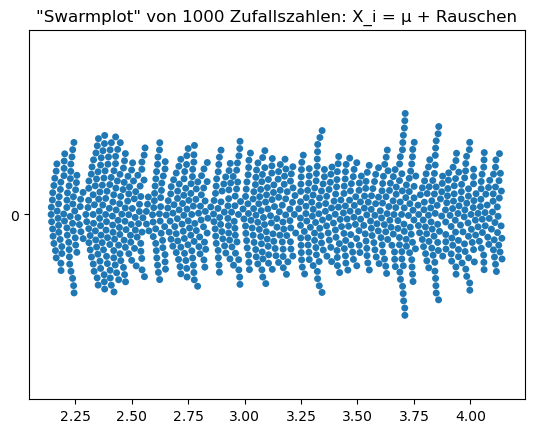

In [163]:
# Zufallszahlen X1,X2,..., wobei X_i = µ + Rauschen
R = np.random.default_rng ( 42 )
µ = 3.141592
x = µ + R.uniform(low=-1,high=1,size=1000)
sns.swarmplot ( data=x, orient="h" );
plt.title('"Swarmplot" von 1000 Zufallszahlen: X_i = µ + Rauschen');


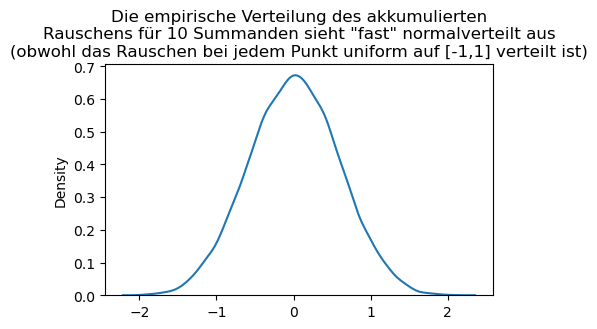

In [184]:
# Betrachte den Ausdruck im ZGWS für n=10.
# Dies ist EINE EINZIGE ZAHL, für die wir keine
# Verteilungsaussage machen können.
# Um eine Verteilungsaussage zu machen, müssen wir
# das Experiment oft (hier 10 000x) wiederholen.

n=10
xs=[ µ + R.uniform(low=-1,high=1,size=1000)
     for repeat in range(10000) ]

zgws = [ (x-µ)[:n].sum() / np.sqrt(n) for x in xs ]     

sns.kdeplot ( zgws )
plt.title( 'Die empirische Verteilung des akkumulierten\nRauschens für 10 Summanden sieht "fast" normalverteilt aus\n(obwohl das Rauschen bei jedem Punkt uniform auf [-1,1] verteilt ist)')
plt.gcf().set_size_inches(5,3);


Der Zentrale Grenzwertsatz ist nicht klausurrelevant (die Aussage, dass die Varianz hier eine Rolle spielt, aber schon).

<center>
<img src="VL05_Material/kontextsensitivitaet.png" width="50%" />
</center>

# <div style="color:gray;">1. Lagemaße</div>
# <div style="color:gray;">2. Informationsvisualisierung</div>
# <div style="color:gray;">3. Streumaße</div>

# Vielen Dank für Ihre Aufmerksamkeit!